# Solutions

1. [Datetime and Timedelta](#1.-Datetime,-Timedelta,-and-Period-Objects)
1. [Selecting Time Series Data](#2.-Selecting-Time-Series-Data)
1. [Grouping by Time](#3.-Grouping-by-Time)
1. [Rolling Windows](#4.-Rolling-Windows)
1. [Grouping by Time and another Column](#5.-Grouping-by-Time-and-another-Column)
1. [More Time Series Functionality](#6.-More-Time-Series-Functionality)

## 1. Datetime, Timedelta, and Period Objects

In [1]:
import pandas as pd

### Exercise 1

<span style="color:green; font-size:16px">What day of the week was Jan 15, 1997?</span>

In [2]:
dt = pd.to_datetime('Jan 15, 1997')
dt.day_name()

'Wednesday'

### Exercise 2

<span style="color:green; font-size:16px">Was 1924 a leap year?</span>

In [3]:
dt = pd.to_datetime('Jan 1, 1924')
dt.is_leap_year

True

### Exercise 3

<span style="color:green; font-size:16px">What year will it be 1 million hours after the UNIX epoch?</span>

In [4]:
dt = pd.to_datetime(1_000_000, unit='h')
dt

Timestamp('2084-01-29 16:00:00')

In [5]:
dt.year

2084

### Exercise 4

<span style="color:green; font-size:16px">Create the datetime July 20, 1969 at 2:56 a.m. and 15 seconds.</span>

In [6]:
dt = pd.to_datetime('1969-07-20 2:56:15')
dt

Timestamp('1969-07-20 02:56:15')

### Exercise 5

<span style="color:green; font-size:16px">Neil Armstrong stepped on the moon at the time in the last Exercise. How many days have passed since that happened? Use the string 'today' when creating your datetime.</span>

In [7]:
dt1 = pd.to_datetime('1969-07-20 2:56:15')
dt2 = pd.to_datetime('today')
dt2

Timestamp('2021-07-01 16:03:51.834463')

In [8]:
td = dt2 - dt1
td

Timedelta('18974 days 13:07:36.834463')

In [9]:
td.days

18974

### Exercise 6

<span style="color:green; font-size:16px">Create the Timedelta 84 hours and 17 minutes with both `pd.Timedelta` and `pd.to_timedelta` and verify that they are equal.</span>

In [10]:
pd.Timedelta('84:17:00') == pd.to_timedelta('84:17:00')

True

### Exercise 7

<span style="color:green; font-size:16px">Which is larger 5,206 days or 123,000 hours?</span>

In [11]:
td1 = pd.to_timedelta(5_206, unit='d')
td2 = pd.to_timedelta(123_000, unit='h')

In [12]:
td1

Timedelta('5206 days 00:00:00')

In [13]:
td2

Timedelta('5125 days 00:00:00')

In [14]:
td1 > td2

True

### Exercise 8

<span style="color:green; font-size:16px">Take a look at the `pd.Timestamp` docstring. Each component (year, month, day, etc...) is available as a parameter in the constructor. Use the parameters to create a time stamp that has a non-zero value for each component.</span>

In [15]:
pd.Timestamp(year=2018, month=12, day=5, hour=17, minute=55, 
             second=3, microsecond=1534)

Timestamp('2018-12-05 17:55:03.001534')

### Exercise 9

<span style="color:green; font-size:16px">Convert the given string to a datetime.</span>

In [16]:
s = 'month=10 year=2021 day=19 hour=6 minute=23'

In [17]:
pd.to_datetime(s, format='month=%m year=%Y day=%d hour=%H minute=%M')

Timestamp('2021-10-19 06:23:00')

### Exercise 10

<span style="color:green; font-size:16px">How many seconds elapsed from Feb 23, 2018 at 5:45 pm until Dec 14, 2020 at 7:32 am</span>

In [18]:
ts1 = pd.Timestamp('Feb 23, 2018 5:45 pm')
ts2 = pd.Timestamp('Dec 14, 2020 7:32 pm')
td = ts2 - ts1
td

Timedelta('1025 days 01:47:00')

In [19]:
td.total_seconds()

88566420.0

In [20]:
ts1.weekofyear

8

### Exercise 11

<span style="color:green; font-size:16px">What day of the year is October 11 on a leap year?</span>

In [21]:
ts = pd.Timestamp('October 11, 2000')
ts.is_leap_year

True

In [22]:
ts.dayofyear

285

### Exercise 12

<span style="color:green; font-size:16px">What was the date and time 198 hours and 33 minutes past December 3, 2020 at 5:15 pm </span>

In [23]:
ts = pd.Timestamp('December 3, 2020 5:15 pm')
td = pd.Timedelta('198:33:00')

In [24]:
ts + td

Timestamp('2020-12-11 23:48:00')

### Exercise 13

<span style="color:green; font-size:16px">It takes painter A 3 days 14 hours and 38 minutes to paint a house. Painter B takes 9 hours and 56 minutes to paint the same house. How many houses of the same size can painter B paint in the time it takes painter A to paint one.</span>

In [25]:
td1 = pd.Timedelta('3 days 14:38:00')
td2 = pd.Timedelta('9:56:00')

In [26]:
int(td1 / td2)

8

### Exercise 14

<span style="color:green; font-size:16px">The following string represents June 3rd, 2020. Convert it to the correct datetime.</span>

In [27]:
s = '3/6/2020'

In [28]:
pd.to_datetime(s, dayfirst=True)

Timestamp('2020-06-03 00:00:00')

### Exercise 15

<span style="color:green; font-size:16px">Create a Period object for the entire minute of 2:32 pm on October 11, 2020.</span>

In [29]:
pd.Period('2020-10-11 2:32 pm')

Period('2020-10-11 14:32', 'T')

### Exercise 16

<span style="color:green; font-size:16px">The City of Houston employee data was retrieved on June 1, 2019. Can you calculate the exact amount of years of experience and assign as a new column named `experience`?</span>

In [30]:
emp = pd.read_csv('../data/employee.csv', parse_dates=['hire_date'])

One year is approximately 365.25 days.

In [31]:
pull_date = pd.to_datetime('2019-6-1')
one_year = pd.to_timedelta(365.25, unit='D')

In [32]:
pull_date

Timestamp('2019-06-01 00:00:00')

In [33]:
one_year

Timedelta('365 days 06:00:00')

In [34]:
emp['experience'] = (pull_date - emp['hire_date']) / one_year
emp.head()

,dept,title,hire_date,salary,sex,race,experience
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White,17.492129
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic,8.542094
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black,13.390828
3,Police,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic,22.012320
4,Police,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White,13.352498


## 2. Selecting Time Series Data

### Exercise 1

<span style="color:green; font-size:16px">Read in the weather time series dataset and place the date column in the index. Then use this DataFrame for the following questions.</span>

In [35]:
weather = pd.read_csv('../data/weather.csv', parse_dates=['date'], index_col='date')
weather.head()

,rain,snow,temperature
date,,,
2007-01-01,Yes,No,68.0
2007-01-02,No,No,55.9
2007-01-03,No,No,62.1
2007-01-04,No,No,69.1
2007-01-05,Yes,No,72.0


In [36]:
weather.tail()

,rain,snow,temperature
date,,,
2018-11-20,No,No,64.0
2018-11-21,No,No,57.0
2018-11-22,No,No,50.0
2018-11-23,No,No,45.0
2018-11-24,No,No,45.0


### Exercise 2

<span style="color:green; font-size:16px">Select all of the month of November, 2010</span>

In [37]:
weather.loc['2010-11']

,rain,snow,temperature
date,,,
2010-11-01,No,No,63.0
2010-11-02,No,No,57.9
2010-11-03,Yes,No,55.9
2010-11-04,Yes,No,54.0
2010-11-05,Yes,No,61.0
2010-11-06,Yes,No,53.1
2010-11-07,No,No,53.1
2010-11-08,No,No,66.9
2010-11-09,No,No,73.0


### Exercise 3

<span style="color:green; font-size:16px">Select all of the second quarter of 2017.</span>

In [38]:
weather.loc['2017Q2']

,rain,snow,temperature
date,,,
2017-04-01,No,No,75.0
2017-04-02,No,No,69.1
2017-04-03,No,No,75.9
2017-04-04,No,No,82.0
2017-04-05,No,No,78.1
...,...,...,...
2017-06-26,No,No,84.9
2017-06-27,No,No,82.9
2017-06-28,No,No,82.9


### Exercise 4

<span style="color:green; font-size:16px">Select data from July 1, 2015 to the end of 2016.</span>

In [39]:
weather.loc['2015Q3':'2016'] # alternatively weather.loc['2015-7':'2016']

,rain,snow,temperature
date,,,
2015-07-01,No,No,87.1
2015-07-02,No,No,87.1
2015-07-03,No,No,78.1
2015-07-04,No,No,87.1
2015-07-05,No,No,90.0
...,...,...,...
2016-12-27,No,No,68.0
2016-12-28,No,No,60.1
2016-12-29,No,No,63.0


### Exercise 5

<span style="color:green; font-size:16px">Select just the rain and snow columns from the January 1, 2008 to January 7, 2008.</span>

In [40]:
weather.loc['2008-1-1':'2008-1-7', ['rain', 'snow']]

,rain,snow
date,,
2008-01-01,No,No
2008-01-02,No,Yes
2008-01-03,No,No
2008-01-04,No,No
2008-01-05,No,No
2008-01-06,No,No
2008-01-07,No,No


### Exercise 6

<span style="color:green; font-size:16px">What was the temperature on June 11, 2011?</span>

In [41]:
weather.loc['2011-6-11', 'temperature']

93.9

### Exercise 7

<span  style="color:green; font-size:16px">How many days did it rain during the last three months of 2011?</span>

In [42]:
weather.loc['2011Q4', 'rain'].value_counts()

No     69
Yes    23
Name: rain, dtype: int64

In [43]:
# to get exact number
(weather.loc['2011Q4', 'rain'] == 'Yes').sum()

23

### Exercise 8

<span style="color:green; font-size:16px">Which year had more snow days, 2007 or 2012?</span>

In [44]:
(weather.loc['2007', 'snow'] == 'Yes').sum()

5

In [45]:
(weather.loc['2012', 'snow'] == 'Yes').sum()

2

### Exercise 9

<span style="color:green; font-size:16px">Select every other Thursday.</span>

In [46]:
weather.asfreq('2W-THU').head()

,rain,snow,temperature
date,,,
2007-01-04,No,No,69.1
2007-01-18,Yes,Yes,35.1
2007-02-01,Yes,Yes,34.0
2007-02-15,No,No,39.9
2007-03-01,Yes,No,66.9


### Exercise 10

<span style="color:green; font-size:16px">Select the first day of each month.</span>

In [47]:
weather.asfreq('MS').head()

,rain,snow,temperature
date,,,
2007-01-01,Yes,No,68.0
2007-02-01,Yes,Yes,34.0
2007-03-01,Yes,No,66.9
2007-04-01,Yes,No,77.0
2007-05-01,No,No,91.9


### Exercise 11

<span style="color:green; font-size:16px">Select every other October 1st.</span>

In [48]:
weather.asfreq('2AS-OCT')

,rain,snow,temperature
date,,,
2007-10-01,No,No,82.0
2009-10-01,No,No,73.0
2011-10-01,No,No,64.0
2013-10-01,No,No,82.0
2015-10-01,No,No,66.0
2017-10-01,No,No,71.1


### Use the temperature dataset for the remaining exercises

Execute the following cell to read in the temperature dataset which sets the datetime column in the index.

In [49]:
df_temp = pd.read_csv('../data/weather/temperature.csv', parse_dates=['datetime'], 
                      index_col='datetime')
df_temp.head()

,Seattle,San Francisco,Los Angeles,Las Vegas,Denver,Houston,Chicago,Atlanta,Miami,New York
datetime,,,,,,,,,,
2013-01-01 00:00:00,2.94,11.50,11.66,7.28,-2.30,8.81,-0.19,1.92,19.41,-1.12
2013-01-01 01:00:00,2.40,10.22,10.67,5.95,-3.23,8.81,0.28,0.60,19.35,-1.69
2013-01-01 02:00:00,1.70,8.02,9.91,5.18,-3.03,8.81,0.33,-0.53,18.99,-1.96
2013-01-01 03:00:00,1.45,7.30,9.33,4.42,-3.67,8.48,0.12,-1.36,18.56,-2.08
2013-01-01 04:00:00,0.95,6.84,8.82,3.62,-5.55,8.34,0.04,-1.44,18.49,-2.32


### Exercise 12

<span style="color:green; font-size:16px">Select the temperatures for Houston between 3 and 6 p.m. on July 4, 2014.</span>

In [50]:
df_temp.loc['2014-7-4 15:00':'2014-7-4 18:00', 'Houston']

datetime
2014-07-04 15:00:00    27.37
2014-07-04 16:00:00    28.85
2014-07-04 17:00:00    30.29
2014-07-04 18:00:00    31.00
Name: Houston, dtype: float64

### Exercise 13

<span style="color:green; font-size:16px">Upsample the result from the previous exercise so that there are entries every 20 minutes.</span>

In [51]:
s = df_temp.loc['2014-7-4 15:00':'2014-7-4 18:00', 'Houston'].asfreq('20min')
s

datetime
2014-07-04 15:00:00    27.37
2014-07-04 15:20:00      NaN
2014-07-04 15:40:00      NaN
2014-07-04 16:00:00    28.85
2014-07-04 16:20:00      NaN
2014-07-04 16:40:00      NaN
2014-07-04 17:00:00    30.29
2014-07-04 17:20:00      NaN
2014-07-04 17:40:00      NaN
2014-07-04 18:00:00    31.00
Freq: 20T, Name: Houston, dtype: float64

### Exercise 14

<span style="color:green; font-size:16px">Linearly interpolate the missing values in the previous exercise to estimate the temperature at 4:40 pm on July 4, 2014.</span>

In [52]:
s1 = s.asfreq('20min').interpolate()
s1

datetime
2014-07-04 15:00:00    27.370000
2014-07-04 15:20:00    27.863333
2014-07-04 15:40:00    28.356667
2014-07-04 16:00:00    28.850000
2014-07-04 16:20:00    29.330000
2014-07-04 16:40:00    29.810000
2014-07-04 17:00:00    30.290000
2014-07-04 17:20:00    30.526667
2014-07-04 17:40:00    30.763333
2014-07-04 18:00:00    31.000000
Freq: 20T, Name: Houston, dtype: float64

In [53]:
s1.loc['2014-7-4 4:40 pm']

29.81000000000002

## 3. Grouping by Time

In [54]:
import pandas as pd
msft = pd.read_csv('../data/stocks/msft20.csv', parse_dates=['date'], index_col='date')
msft.head(3)

,open,high,low,close,adjusted_close,volume,dividend_amount
date,,,,,,,
1999-10-19,88.250,89.250,85.25,86.313,27.8594,69945600,0.0
1999-10-20,91.563,92.375,90.25,92.250,29.7758,88090600,0.0
1999-10-21,90.563,93.125,90.50,93.063,30.0381,60801200,0.0


### Exercise 1

<span style="color:green; font-size:16px">In which week did MSFT have the greatest number of its shares (volume) traded?</span>

In [55]:
volume = msft.resample('W').agg({'volume':'sum'})
volume.head()

,volume
date,
1999-10-24,262488000
1999-10-31,287399400
1999-11-07,268534000
1999-11-14,541663200
1999-11-21,295783800


In [56]:
volume.agg(['max', 'idxmax'])

,volume
max,879723200
idxmax,2006-05-07 00:00:00


### Exercise 2

<span style="color:green; font-size:16px">With help from the `diff` method, find the quarter containing the most number of "up" days. An up day is when the adjusted close of the current day is greater than the previous day.</span>

Use diff to find the difference between the current row and the one directly above it.

In [57]:
msft['adjusted_close'].diff().head()

date
1999-10-19       NaN
1999-10-20    1.9164
1999-10-21    0.2623
1999-10-22   -0.1210
1999-10-25   -0.0807
Name: adjusted_close, dtype: float64

In [58]:
up_days = msft['adjusted_close'].diff() > 0
up_days.head()

date
1999-10-19    False
1999-10-20     True
1999-10-21     True
1999-10-22    False
1999-10-25    False
Name: adjusted_close, dtype: bool

In [59]:
up_days.resample('Q').sum().head()

date
1999-12-31    24
2000-03-31    32
2000-06-30    30
2000-09-30    23
2000-12-31    29
Freq: Q-DEC, Name: adjusted_close, dtype: int64

In [60]:
up_days.resample('Q').sum().agg(['max', 'idxmax'])

max                        43
idxmax    2001-12-31 00:00:00
Name: adjusted_close, dtype: object

### Exercise 3

<span style="color:green; font-size:16px">Find the mean price per year along with the minimum and maximum volume.</span>

In [61]:
msft.resample('Y').agg({'adjusted_close': 'mean', 
                        'volume':['min', 'max']}).head()

adjusted_close    volume           
                     mean       min        max
date                                          
1999-12-31      31.267802  12517600  243819200
2000-12-31      24.601943  15734800  313645800
2001-12-31      20.186950  11701600  209348800
2002-12-31      17.606981  18386000  202307800
2003-12-31      16.917920  12076900  210558300

### Exercise 4

<span style="color:green; font-size:16px">Find the mean of each column for every 6 month time period. The first time period should start on the month in the first row.</span>

In [62]:
msft.resample('6MS').mean().head()

,open,high,low,close,adjusted_close,volume,dividend_amount
date,,,,,,,
1999-10-01,99.483626,101.524673,97.742539,99.664739,32.169063,6.881454e+07,0.0
2000-04-01,71.997584,73.081694,70.671567,71.754222,23.160267,7.102180e+07,0.0
2000-10-01,58.145086,59.643325,56.805082,58.132640,18.763582,9.557858e+07,0.0
2001-04-01,65.129725,66.240963,64.089618,65.175279,21.036842,7.723125e+07,0.0
2001-10-01,62.886563,63.912634,62.026427,62.991855,20.332069,6.147958e+07,0.0


### Exercise 5

<span style="color:green; font-size:16px">Repeat exercise 4 using a time span of 3 years where the year begins July 1.</span>

In [63]:
msft.resample('3AS-Jul').mean().head()

,open,high,low,close,adjusted_close,volume,dividend_amount
date,,,,,,,
1999-07-01,69.487248,70.805493,68.263427,69.497398,22.431853,7.474444e+07,0.000000
2002-07-01,31.591090,31.945893,31.225483,31.568721,17.448777,6.987057e+07,0.004703
2005-07-01,28.210885,28.479904,27.970386,28.214272,21.107137,6.750704e+07,0.001538
2008-07-01,24.989465,25.292230,24.681177,24.990675,19.746500,6.677171e+07,0.002153
2011-07-01,31.582066,31.855132,31.306446,31.599248,27.001569,4.788299e+07,0.003612


### Exercise 6

<span style="color:green; font-size:16px">Repeat exercise five using the `groupby` method instead of `resample`.</span>

In [64]:
msft.groupby(pd.Grouper(freq='3AS-Jul')).mean().head()

,open,high,low,close,adjusted_close,volume,dividend_amount
date,,,,,,,
1999-07-01,69.487248,70.805493,68.263427,69.497398,22.431853,7.474444e+07,0.000000
2002-07-01,31.591090,31.945893,31.225483,31.568721,17.448777,6.987057e+07,0.004703
2005-07-01,28.210885,28.479904,27.970386,28.214272,21.107137,6.750704e+07,0.001538
2008-07-01,24.989465,25.292230,24.681177,24.990675,19.746500,6.677171e+07,0.002153
2011-07-01,31.582066,31.855132,31.306446,31.599248,27.001569,4.788299e+07,0.003612


### Use the temperature dataset for the remaining exercises

Execute the following cell to read in the temperature dataset which sets the datetime column in the index.

In [65]:
temp = pd.read_csv('../data/weather/temperature.csv', 
                   parse_dates=['datetime'], index_col='datetime')
temp.head()

,Seattle,San Francisco,Los Angeles,Las Vegas,Denver,Houston,Chicago,Atlanta,Miami,New York
datetime,,,,,,,,,,
2013-01-01 00:00:00,2.94,11.50,11.66,7.28,-2.30,8.81,-0.19,1.92,19.41,-1.12
2013-01-01 01:00:00,2.40,10.22,10.67,5.95,-3.23,8.81,0.28,0.60,19.35,-1.69
2013-01-01 02:00:00,1.70,8.02,9.91,5.18,-3.03,8.81,0.33,-0.53,18.99,-1.96
2013-01-01 03:00:00,1.45,7.30,9.33,4.42,-3.67,8.48,0.12,-1.36,18.56,-2.08
2013-01-01 04:00:00,0.95,6.84,8.82,3.62,-5.55,8.34,0.04,-1.44,18.49,-2.32


### Exercise 7

<span style="color:green; font-size:16px">Find the mean temperature of every city for every 8 hour time period.</span>

In [66]:
temp.resample('8H').mean().head(6)

,Seattle,San Francisco,Los Angeles,Las Vegas,Denver,Houston,Chicago,Atlanta,Miami,New York
datetime,,,,,,,,,,
2013-01-01 00:00:00,1.33750,7.69875,9.22625,4.89125,-4.74625,8.71875,0.04875,-0.78000,19.00625,-2.28000
2013-01-01 08:00:00,-0.05625,3.97750,5.62500,2.37000,-8.02500,11.24375,1.05500,-0.16750,20.16625,-1.54250
2013-01-01 16:00:00,2.03750,8.42000,11.72125,6.13875,-5.85750,15.62875,-0.13125,10.00375,22.66750,2.59250
2013-01-02 00:00:00,1.45500,7.60250,9.49000,2.94625,-9.14375,18.82625,-5.02750,8.60375,21.32125,3.07500
2013-01-02 08:00:00,-0.62125,5.04500,5.92875,-1.06500,-11.80625,14.46000,-8.68375,8.61375,21.77625,3.61875
2013-01-02 16:00:00,2.26125,8.76750,12.42500,4.89875,-3.93250,11.65875,-5.09125,10.04000,24.38625,2.91250


### Exercise 8

<span style="color:green; font-size:16px">Verify that there are 24 rows for each day.</span>

In [67]:
temp.resample('D').size().head()

datetime
2013-01-01    24
2013-01-02    24
2013-01-03    24
2013-01-04    24
2013-01-05    24
Freq: D, dtype: int64

Get the unique values.

In [68]:
temp.resample('D').size().unique()

array([24])

### Exercise 9

<span style="color:green; font-size:16px">For each month, return the maximum temperature amongst all cities.</span>

In [69]:
# get max temperature for each city
max_temp = temp.resample('M').max()
max_temp.head()

,Seattle,San Francisco,Los Angeles,Las Vegas,Denver,Houston,Chicago,Atlanta,Miami,New York
datetime,,,,,,,,,,
2013-01-31,10.65,16.69,25.54,17.47,17.00,25.57,14.00,22.86,27.36,13.12
2013-02-28,11.55,19.94,26.29,20.66,16.26,25.97,10.95,18.21,28.71,12.63
2013-03-31,18.31,23.22,27.61,29.74,22.49,31.64,14.62,24.51,31.07,14.18
2013-04-30,21.43,30.11,27.94,36.10,25.17,28.07,22.79,28.58,30.42,27.91
2013-05-31,28.72,30.90,32.58,38.18,29.54,32.21,31.67,30.13,32.07,32.84


In [70]:
# now get maximum amongst all cities
max_temp.max(axis=1).head()

datetime
2013-01-31    27.36
2013-02-28    28.71
2013-03-31    31.64
2013-04-30    36.10
2013-05-31    38.18
Freq: M, dtype: float64

### Exercise 10

<span style="color:green; font-size:16px">For each month, return the maximum temperature amongst all cities along with the city name where the maximum occurred. Return a two-column DataFrame, where the first column is the maximum temperature, and the second is the city. The index should be the month.</span>

In [71]:
# use max_temp from exercise 9
max_temp.agg(['max', 'idxmax'], axis=1).head(10)

,max,idxmax
2013-01-31,27.36,Miami
2013-02-28,28.71,Miami
2013-03-31,31.64,Houston
2013-04-30,36.1,Las Vegas
2013-05-31,38.18,Las Vegas
2013-06-30,45.49,Las Vegas
2013-07-31,45.26,Las Vegas
2013-08-31,42.54,Las Vegas
2013-09-30,38.8,Los Angeles
2013-10-31,40.6,Denver


## 4. Rolling Windows

In [72]:
temp = pd.read_csv('../data/weather/temperature.csv', 
                   parse_dates=['datetime'], index_col='datetime')
temp.head()

,Seattle,San Francisco,Los Angeles,Las Vegas,Denver,Houston,Chicago,Atlanta,Miami,New York
datetime,,,,,,,,,,
2013-01-01 00:00:00,2.94,11.50,11.66,7.28,-2.30,8.81,-0.19,1.92,19.41,-1.12
2013-01-01 01:00:00,2.40,10.22,10.67,5.95,-3.23,8.81,0.28,0.60,19.35,-1.69
2013-01-01 02:00:00,1.70,8.02,9.91,5.18,-3.03,8.81,0.33,-0.53,18.99,-1.96
2013-01-01 03:00:00,1.45,7.30,9.33,4.42,-3.67,8.48,0.12,-1.36,18.56,-2.08
2013-01-01 04:00:00,0.95,6.84,8.82,3.62,-5.55,8.34,0.04,-1.44,18.49,-2.32


### Exercise 1

<span style="color:green; font-size:16px">Calculate a 6-hour moving average of temperature. Set the minimum number of rows used in the group to 1.</span>

In [73]:
temp.rolling('6H', min_periods=1).mean().head()

,Seattle,San Francisco,Los Angeles,Las Vegas,Denver,Houston,Chicago,Atlanta,Miami,New York
datetime,,,,,,,,,,
2013-01-01 00:00:00,2.940000,11.500000,11.660000,7.280000,-2.300000,8.8100,-0.190,1.920000,19.4100,-1.1200
2013-01-01 01:00:00,2.670000,10.860000,11.165000,6.615000,-2.765000,8.8100,0.045,1.260000,19.3800,-1.4050
2013-01-01 02:00:00,2.346667,9.913333,10.746667,6.136667,-2.853333,8.8100,0.140,0.663333,19.2500,-1.5900
2013-01-01 03:00:00,2.122500,9.260000,10.392500,5.707500,-3.057500,8.7275,0.135,0.157500,19.0775,-1.7125
2013-01-01 04:00:00,1.888000,8.776000,10.078000,5.290000,-3.556000,8.6500,0.116,-0.162000,18.9600,-1.8340


### Exercise 2

<span style="color:green; font-size:16px">How many observations are there in each 30-day rolling window of time? Use the `count` method because the `size` method is not available.</span>

There are 720 (`24 * 30`) observations per period as there are observations each hour.

In [74]:
temp.rolling('30D', min_periods=1).count().tail()

,Seattle,San Francisco,Los Angeles,Las Vegas,Denver,Houston,Chicago,Atlanta,Miami,New York
datetime,,,,,,,,,,
2016-12-31 19:00:00,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0
2016-12-31 20:00:00,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0
2016-12-31 21:00:00,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0
2016-12-31 22:00:00,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0
2016-12-31 23:00:00,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0


### Exercise 3

<span style="color:green; font-size:16px">Calculate the 30-day moving average for Los Angeles and Houston using a 1-row minimum. What percentage of the rows does Houston have a higher temperature?</span>

In [75]:
houston = temp['Houston'].rolling('30D', min_periods=1).mean()
los_angeles = temp['Los Angeles'].rolling('30D', min_periods=1).mean()
(houston > los_angeles).mean()

0.8586584531143052

### Exercise 4

<span style="color:green; font-size:16px">Calculate the minimum, maximum, and mean temperatures for Houston using a rolling 14-day period and plot the results.</span>

<AxesSubplot:xlabel='datetime'>

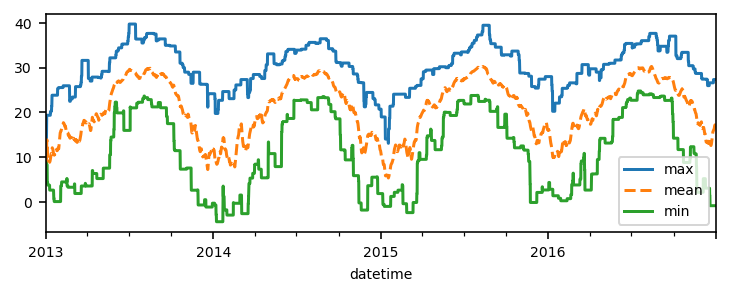

In [76]:
import matplotlib.pyplot as plt
plt.style.use('../../mdap.mplstyle')
houston = temp['Houston'].rolling('14D', min_periods=1).agg(['max', 'mean', 'min'])
houston.plot(figsize=(6, 2), style=['-', '--', '-'])

## 5. Grouping by Time and another Column

In [77]:
import pandas as pd
energy = pd.read_csv('../data/energy_consumption.csv', parse_dates=['date'], 
                     index_col='date')
energy.head()

,source,energy (btu)
date,,
1973-01-01,residential,1932.187
1973-02-01,residential,1687.255
1973-03-01,residential,1497.067
1973-04-01,residential,1177.661
1973-05-01,residential,1015.008


### Exercise 1

<span style="color:green; font-size:16px">Find the average energy consumption per sector per 10 year time span beginning from the first year of data. Return the results using both `groupby` and `pivot_table`.</span>

In [78]:
tg = pd.Grouper(freq='10YS')
energy.groupby(['source', tg]).agg({'energy (btu)':['sum', 'size']}).astype('int')

energy (btu)     
                                   sum size
source         date                        
commercial     1973-01-01       101931  120
               1983-01-01       123438  120
               1993-01-01       157480  120
               2003-01-01       178566  120
               2013-01-01       102779   68
industrial     1973-01-01       314461  120
               1983-01-01       301236  120
               1993-01-01       339833  120
               2003-01-01       315776  120
               2013-01-01       180058   68
residential    1973-01-01       153900  120
               1983-01-01       166286  120
               1993-01-01       193051  120
               2003-01-01       211705  120
               2013-01-01       117522   68
transportation 1973-01-01       193286  120
               1983-01-01       212926  120
               1993-01-01       249648  120
               2003-01-01       274455  120
               2013-01-01       156173   68

In [79]:
energy.pivot_table(index=tg, columns='source', 
                   values='energy (btu)', aggfunc='sum').astype('int')

source,commercial,industrial,residential,transportation
date,,,,
1973-01-01,101931,314461,153900,193286
1983-01-01,123438,301236,166286,212926
1993-01-01,157480,339833,193051,249648
2003-01-01,178566,315776,211705,274455
2013-01-01,102779,180058,117522,156173


### Use the bikes dataset for the remaining exercises

Execute the following cell to read in the bikes dataset. Note, that it does NOT set the index to be a datetime.

In [80]:
bikes = pd.read_csv('../data/bikes.csv', parse_dates=['starttime', 'stoptime'])
bikes.head(3)

,trip_id,gender,starttime,stoptime,tripduration,from_station_name,dpcapacity_start,to_station_name,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events
0,7147,Male,2013-06-28 19:01:00,2013-06-28 19:17:00,993,Lake Shore Dr & Monroe St,11.0,Michigan Ave & Oak St,15.0,73.9,10.0,12.7,-9999.0,mostlycloudy
1,7524,Male,2013-06-28 22:53:00,2013-06-28 23:03:00,623,Clinton St & Washington Blvd,31.0,Wells St & Walton St,19.0,69.1,10.0,6.9,-9999.0,partlycloudy
2,10927,Male,2013-06-30 14:43:00,2013-06-30 15:01:00,1040,Sheffield Ave & Kingsbury St,15.0,Dearborn St & Monroe St,23.0,73.0,10.0,16.1,-9999.0,mostlycloudy


### Exercise 2

<span style="color:green; font-size:16px">Filter the data so that it only contains rows from the five most frequent `from_station_name` values. Then find the mean temperature at every station for every quarter. Present the result as a pivot table.</span>

In [81]:
top5 = bikes['from_station_name'].value_counts().index[:5]
top5

Index(['Clinton St & Washington Blvd', 'Canal St & Adams St',
       'Clinton St & Madison St', 'Canal St & Madison St',
       'Columbus Dr & Randolph St'],
      dtype='object')

In [82]:
df = bikes.query('from_station_name in @top5')
df.head()

,trip_id,gender,starttime,stoptime,tripduration,from_station_name,dpcapacity_start,to_station_name,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events
1,7524,Male,2013-06-28 22:53:00,2013-06-28 23:03:00,623,Clinton St & Washington Blvd,31.0,Wells St & Walton St,19.0,69.1,10.0,6.9,-9999.0,partlycloudy
8,21028,Male,2013-07-03 15:21:00,2013-07-03 15:42:00,1300,Clinton St & Washington Blvd,31.0,Wood St & Division St,15.0,71.1,8.0,0.0,-9999.0,cloudy
34,54257,Male,2013-07-12 18:13:00,2013-07-12 18:40:00,1616,Clinton St & Madison St,23.0,Damen Ave & Pierce Ave,19.0,78.1,10.0,10.4,-9999.0,partlycloudy
43,64519,Female,2013-07-15 08:25:00,2013-07-15 08:28:00,185,Clinton St & Madison St,23.0,Canal St & Jackson Blvd,35.0,82.0,10.0,0.0,-9999.0,partlycloudy
60,71812,Male,2013-07-17 10:23:00,2013-07-17 10:40:00,1024,Clinton St & Washington Blvd,31.0,Larrabee St & Menomonee St,15.0,88.0,10.0,5.8,-9999.0,partlycloudy


This filters the data from 50k rows down to 3.4k.

In [83]:
df.shape

(3419, 14)

In [84]:
bikes.shape

(50089, 14)

In [85]:
tg = pd.Grouper(freq='Q', key='starttime')
df.pivot_table(index=tg, columns='from_station_name', 
               values='temperature', aggfunc='mean').round(1)

from_station_name,Canal St & Adams St,Canal St & Madison St,Clinton St & Madison St,Clinton St & Washington Blvd,Columbus Dr & Randolph St
starttime,,,,,
2013-06-30,NaN,NaN,NaN,69.1,NaN
2013-09-30,61.9,75.7,74.8,70.9,73.6
2013-12-31,38.7,45.1,41.2,44.4,43.6
2014-03-31,35.8,27.8,26.7,29.1,26.0
2014-06-30,61.4,64.2,66.1,62.0,65.6
2014-09-30,68.2,70.7,70.9,70.3,75.1
2014-12-31,40.8,42.7,45.8,43.1,44.8
2015-03-31,25.5,24.4,32.6,32.7,24.7
2015-06-30,60.9,63.9,63.9,61.3,66.6


### Exercise 3

<span style="color:green; font-size:16px">Find the number of rides per day from each `from_station_name`.</span>

In [86]:
s = bikes.groupby(['from_station_name', pd.Grouper(freq='D', key='starttime')]).size()
s.tail()

from_station_name             starttime 
Woodlawn Ave & Lake Park Ave  2017-02-01    1
                              2017-03-20    1
                              2017-04-25    1
                              2017-06-10    1
Yates Blvd & 75th St          2015-09-18    1
dtype: int64

### Exercise 4

<span style="color:green; font-size:16px">Reset the `from_station_name` index level from the solution in exercise 3 and then perform a 100 day rolling window of each `from_station_name` calculating the number of rides in this group.</span>

In [87]:
df = s.reset_index('from_station_name', name='size')
df.head()

,from_station_name,size
starttime,,
2016-08-13,2112 W Peterson Ave,1
2016-09-01,2112 W Peterson Ave,1
2016-09-06,2112 W Peterson Ave,1
2016-09-29,2112 W Peterson Ave,1
2016-10-30,2112 W Peterson Ave,1


In [88]:
df.groupby('from_station_name').rolling('100D')['size'].sum()

from_station_name             starttime 
2112 W Peterson Ave           2016-08-13    1.0
                              2016-09-01    2.0
                              2016-09-06    3.0
                              2016-09-29    4.0
                              2016-10-30    5.0
                                           ... 
Woodlawn Ave & Lake Park Ave  2017-02-01    1.0
                              2017-03-20    2.0
                              2017-04-25    3.0
                              2017-06-10    3.0
Yates Blvd & 75th St          2015-09-18    1.0
Name: size, Length: 45150, dtype: float64

## 6. More Time Series Functionality

In [89]:
import pandas as pd
df = pd.read_csv('../data/stocks/stocks10.csv', parse_dates=['date'], 
                 index_col='date')
df.head(3)

,MSFT,AAPL,SLB,AMZN,TSLA,XOM,WMT,T,FB,V
date,,,,,,,,,,
1999-10-25,29.84,2.32,17.02,82.75,NaN,21.45,38.99,16.78,NaN,NaN
1999-10-26,29.82,2.34,16.65,81.25,NaN,20.89,37.11,17.28,NaN,NaN
1999-10-27,29.33,2.38,16.52,75.94,NaN,20.80,36.94,18.27,NaN,NaN


### Exercise 1

<span style="color:green; font-size:16px">Select the first three trading days of every sixth year.</span>

In [90]:
df.groupby(pd.Grouper(freq='6AS')).head(3)

,MSFT,AAPL,SLB,AMZN,TSLA,XOM,WMT,T,FB,V
date,,,,,,,,,,
1999-10-25,29.84,2.32,17.02,82.75,NaN,21.45,38.99,16.78,NaN,NaN
1999-10-26,29.82,2.34,16.65,81.25,NaN,20.89,37.11,17.28,NaN,NaN
1999-10-27,29.33,2.38,16.52,75.94,NaN,20.80,36.94,18.27,NaN,NaN
2005-01-03,19.47,3.95,23.73,44.52,NaN,33.26,38.41,11.54,NaN,NaN
2005-01-04,19.54,3.99,23.55,42.14,NaN,33.04,38.32,11.41,NaN,NaN
2005-01-05,19.50,4.02,23.62,41.77,NaN,32.87,38.37,11.47,NaN,NaN
2011-01-03,22.56,41.09,66.87,184.22,26.62,56.09,43.74,18.26,NaN,16.50
2011-01-04,22.65,41.30,65.26,185.01,26.67,56.35,43.91,18.38,NaN,16.52
2011-01-05,22.57,41.64,66.03,187.42,26.83,56.20,43.62,18.45,NaN,16.87


### Exercise 2

<span style="color:green; font-size:16px">Select the Wednesday in the 19th week of all the leap years.</span>

In [91]:
filt1 = df.index.isocalendar()['week'] == 19
filt2 = df.index.day_name() == "Wednesday"
filt3 = df.index.is_leap_year
filt = filt1 & filt2 * filt3
df[filt]

,MSFT,AAPL,SLB,AMZN,TSLA,XOM,WMT,T,FB,V
date,,,,,,,,,,
2000-05-10,21.36,3.10,24.94,53.31,NaN,23.90,39.59,17.30,NaN,NaN
2004-05-05,17.13,1.66,21.17,44.26,NaN,28.70,39.93,11.19,NaN,NaN
2008-05-07,22.22,22.76,78.56,73.18,NaN,62.63,43.05,20.50,NaN,20.37
2012-05-09,25.63,70.96,56.58,222.98,30.06,64.51,49.28,22.00,NaN,27.75
2016-05-11,47.58,87.71,65.33,713.23,208.96,77.98,61.40,32.38,119.52,75.60


### Exercise 3

<span style="color:green; font-size:16px">Shift all dates in the index up three weeks ending on Sunday.</span>

In [92]:
df.shift(3, 'W').head(10)

,MSFT,AAPL,SLB,AMZN,TSLA,XOM,WMT,T,FB,V
date,,,,,,,,,,
1999-11-14,29.84,2.32,17.02,82.75,NaN,21.45,38.99,16.78,NaN,NaN
1999-11-14,29.82,2.34,16.65,81.25,NaN,20.89,37.11,17.28,NaN,NaN
1999-11-14,29.33,2.38,16.52,75.94,NaN,20.80,36.94,18.27,NaN,NaN
1999-11-14,29.01,2.43,16.59,71.00,NaN,21.19,38.85,19.79,NaN,NaN
1999-11-14,29.88,2.50,17.21,70.62,NaN,21.47,39.25,20.00,NaN,NaN
1999-11-21,29.82,2.42,17.76,69.12,NaN,21.67,39.20,20.10,NaN,NaN
1999-11-21,29.88,2.50,17.02,66.44,NaN,21.48,39.12,19.24,NaN,NaN
1999-11-21,29.70,2.54,17.23,65.81,NaN,21.16,38.85,19.17,NaN,NaN
1999-11-21,29.61,2.61,17.09,63.06,NaN,21.16,39.03,19.39,NaN,NaN


### Exercise 4

<span style="color:green; font-size:16px">Create a DatetimeIndex object containing every Friday in the year 2021.</span>

In [93]:
pd.date_range('2021-1-1', '2021-12-31', freq='W-FRI')

DatetimeIndex(['2021-01-01', '2021-01-08', '2021-01-15', '2021-01-22',
               '2021-01-29', '2021-02-05', '2021-02-12', '2021-02-19',
               '2021-02-26', '2021-03-05', '2021-03-12', '2021-03-19',
               '2021-03-26', '2021-04-02', '2021-04-09', '2021-04-16',
               '2021-04-23', '2021-04-30', '2021-05-07', '2021-05-14',
               '2021-05-21', '2021-05-28', '2021-06-04', '2021-06-11',
               '2021-06-18', '2021-06-25', '2021-07-02', '2021-07-09',
               '2021-07-16', '2021-07-23', '2021-07-30', '2021-08-06',
               '2021-08-13', '2021-08-20', '2021-08-27', '2021-09-03',
               '2021-09-10', '2021-09-17', '2021-09-24', '2021-10-01',
               '2021-10-08', '2021-10-15', '2021-10-22', '2021-10-29',
               '2021-11-05', '2021-11-12', '2021-11-19', '2021-11-26',
               '2021-12-03', '2021-12-10', '2021-12-17', '2021-12-24',
               '2021-12-31'],
              dtype='datetime64[ns]', freq='W-F

### Exercise 5

<span style="color:green; font-size:16px">Starting from January 1, 1900, create 20 timestamps separated by 57 days each.</span>

In [94]:
pd.date_range('January 1, 1900', periods=20, freq='57D')

DatetimeIndex(['1900-01-01', '1900-02-27', '1900-04-25', '1900-06-21',
               '1900-08-17', '1900-10-13', '1900-12-09', '1901-02-04',
               '1901-04-02', '1901-05-29', '1901-07-25', '1901-09-20',
               '1901-11-16', '1902-01-12', '1902-03-10', '1902-05-06',
               '1902-07-02', '1902-08-28', '1902-10-24', '1902-12-20'],
              dtype='datetime64[ns]', freq='57D')

### Exercise 6

<span style="color:green; font-size:16px">Using January 1, 2021 as the end date. Find the previous 15 timestamps separated by 23 month starts</span>

In [95]:
pd.date_range(end='January 31, 2021', periods=15, freq='23MS')

DatetimeIndex(['1994-03-01', '1996-02-01', '1998-01-01', '1999-12-01',
               '2001-11-01', '2003-10-01', '2005-09-01', '2007-08-01',
               '2009-07-01', '2011-06-01', '2013-05-01', '2015-04-01',
               '2017-03-01', '2019-02-01', '2021-01-01'],
              dtype='datetime64[ns]', freq='23MS')

### Exercise 7

<span style="color:green; font-size:16px">You are running an experiment beginning at 8:32 a.m. and concluding at 4 p.m. You need to check in on it every 19 minutes. Create a TimedeltaIndex of the check-in times.</span>

In [96]:
pd.timedelta_range('8:32:00', '16:00:00', freq='19min')

TimedeltaIndex(['0 days 08:32:00', '0 days 08:51:00', '0 days 09:10:00',
                '0 days 09:29:00', '0 days 09:48:00', '0 days 10:07:00',
                '0 days 10:26:00', '0 days 10:45:00', '0 days 11:04:00',
                '0 days 11:23:00', '0 days 11:42:00', '0 days 12:01:00',
                '0 days 12:20:00', '0 days 12:39:00', '0 days 12:58:00',
                '0 days 13:17:00', '0 days 13:36:00', '0 days 13:55:00',
                '0 days 14:14:00', '0 days 14:33:00', '0 days 14:52:00',
                '0 days 15:11:00', '0 days 15:30:00', '0 days 15:49:00'],
               dtype='timedelta64[ns]', freq='19T')